In [92]:
import os 
os.chdir("..")
print("El directorio es:", os.getcwd())
print("Los elementos en el directorio son:", os.listdir())

El directorio es: c:\
Los elementos en el directorio son: ['$Recycle.Bin', '$SysReset', '$WinREAgent', 'Documents and Settings', 'DumpStack.log', 'DumpStack.log.tmp', 'Games', 'hiberfil.sys', 'hp', 'OneDriveTemp', 'pagefile.sys', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Recovery', 'swapfile.sys', 'System Volume Information', 'system.sav', 'texlive', 'Users', 'Windows']


In [93]:
# Importamos las librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos las clases y funciones creadas
from src.helpers import Timer
from src.simulation_funcitons import Simulador, OneSampleTTestPower

### **Ejemplo de Uso Clase "Simulador"**

In [94]:
# Esta Clase genera "num_simulaciones" simulaciones de una distribución normal "n" variada, cuyo vector de medias
# es \vec{1}*"mu", y su matriz de covarianzas está generada con un modelo "variog_model", con parámetros "sigma2", 
# "tau2", "phi". A su vez, cada realización de esta variable aleatoria está asociada con unas coordenadas, las cuales 
# se definen en "grid_type", y está ubicadas en un rectángulo delimitado por los parámetros "min_x_grid", "max_x_grid",
# "min_y_grid", "max_y_grid". El parámetros "max_h" es la máxima distancia h para el gráfico de semivariograma.

In [95]:
# Instanciamos la clase
sim = Simulador(n=100,
                num_simulaciones=1,
                mu=0,
                variog_model="exponencial",
                tau2=0, 
                sigma2=5, 
                phi=30,
                max_h=100, 
                grid_type="random", 
                min_x_grid=0, 
                max_x_grid=100, 
                min_y_grid=0, 
                max_y_grid=100)

# Corremos la simulación
sim.run()

In [96]:
# Obtenemos las coordenadas de la malla simulada
sim.grid

,x,y
0,56.808007,18.091484
1,53.275660,73.239579
2,12.316247,20.287768
3,55.732036,61.182333
4,96.221529,72.955196
...,...,...
95,90.982735,61.273817
96,2.999438,71.874081
97,90.914545,30.763214
98,16.160645,54.203755


In [97]:
# Graficamos la malla simulada
sim.plot_grid()

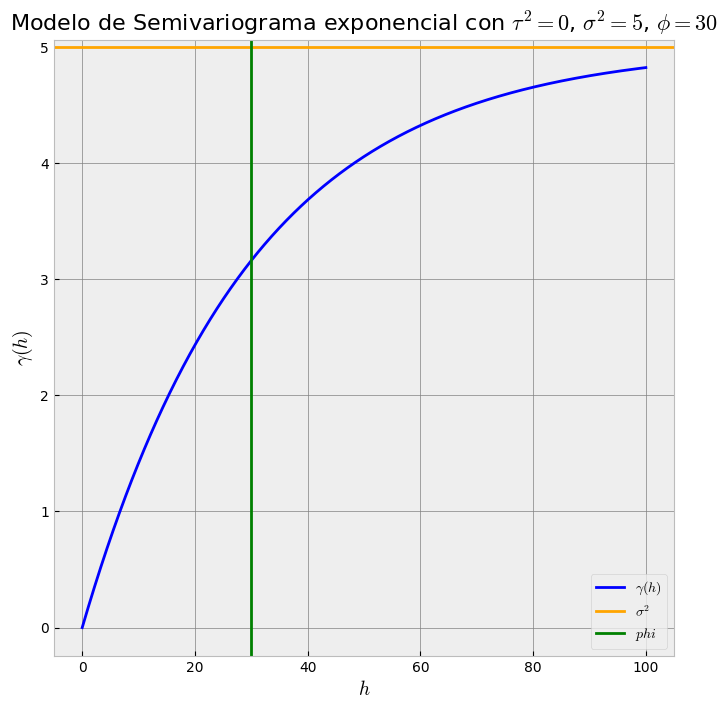

In [98]:
# Graficamos el modelo de semivariograma usado
sim.plot_cov_model()

In [99]:
# Obtenemos la matriz de covarianzas
sim.cov_matrix

array([[5.        , 0.79247131, 1.13266515, ..., 1.48679483, 0.81631176,
        2.77254641],
       [0.79247131, 5.        , 0.53684501, ..., 0.75402037, 1.24488049,
        0.45236734],
       [1.13266515, 0.53684501, 5.        , ..., 0.3556984 , 1.60266112,
        0.80122402],
       ...,
       [1.48679483, 0.75402037, 0.3556984 , ..., 5.        , 0.36714775,
        1.34747041],
       [0.81631176, 1.24488049, 1.60266112, ..., 0.36714775, 5.        ,
        0.47057425],
       [2.77254641, 0.45236734, 0.80122402, ..., 1.34747041, 0.47057425,
        5.        ]], shape=(100, 100))

In [100]:
# Obtenemos las simulaciones 
sim.samples

array([[-2.60107108,  2.63159934,  0.44809961,  0.27500159,  3.05250784,
         2.49900104,  3.10589377,  1.32416241, -0.86369976, -1.44937713,
         0.19232537, -1.81876423,  2.1189321 , -1.10721234,  1.62975743,
         3.79316606, -0.85748565,  2.59085892,  3.28413984,  0.40675184,
         2.60680896,  1.83082109, -0.49874738,  0.629241  ,  0.78724391,
        -0.9938345 ,  3.59195355,  2.9809772 , -1.61890629,  0.00955592,
         3.9946752 ,  1.02806804,  3.55542403,  0.87871545, -3.59094282,
         1.30489821, -0.29448019, -1.97006026,  4.28433761,  3.05466788,
         3.03758327, -0.36014521,  1.41014721, -3.92546945, -0.42749657,
        -1.18490963, -1.41745864,  4.84494865,  3.19325029, -0.71230464,
         3.59715926,  2.26021533,  3.20754532, -2.21640413,  3.20188247,
         1.02676474, -0.09507613,  4.9186785 ,  2.19526134,  1.36218451,
         3.92866562, -0.49829732,  1.93456367, -2.71744412,  1.81436978,
        -2.817699  , -0.19972823,  2.66620516,  4.0

In [101]:
normal = np.random.normal(0, 1, 100)

<Axes: ylabel='Count'>

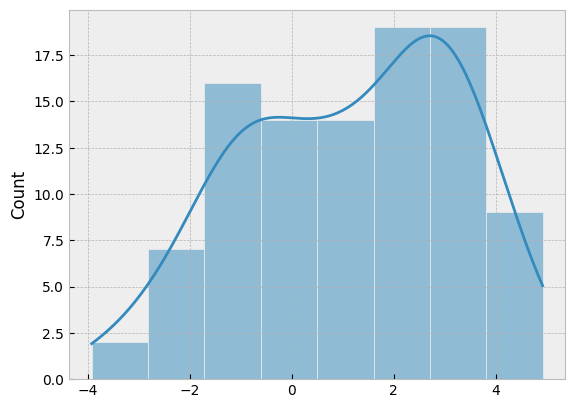

In [102]:
sns.histplot(sim.samples[0], kde=True)

### **Ejemplo de Uso Clase "OneSampleTTestPower"**

In [ ]:
# Instanciamos la clase
test = OneSampleTTestPower(alpha=0.05, 
                           simulador=Simulador, 
                           valores_grid_type=["random"],
                           min_x_grid=0,
                           max_x_grid=100,
                           min_y_grid=0,
                           max_y_grid=100,
                           valores_mu=[0],
                           valores_variog_model=["exponencial"],
                           valores_sigma2=[1],
                           valores_tau2=[0], 
                           valores_phi=[0], 
                           valores_n=[100],
                           min_delta=0, 
                           max_delta=0, 
                           n_points_delta=1,
                           n_bootstrap=10000)

In [ ]:
# Corremos las pruebas
with Timer() as t:
    test.run()

In [ ]:
test.resultados_totales